In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import nbformat as nbf

In [29]:
df = pd.read_csv("C:/Users/SANDY/Desktop/DATA ANALYSIS FILES - JULY 2024/CognoRise DS Internship Oct 2024/2. FAKE NEWS PREDICTION PROJECT/news.csv")

In [30]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


# Remove unnecessary column

In [32]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


# Check for any missing values

In [34]:
missing_values = df.isnull().sum()
missing_values

title    0
text     0
label    0
dtype: int64

# Split data into training and testing sets

In [35]:
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TfidfVectorizer and Logistic Regression model

In [36]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
log_reg_model = LogisticRegression(max_iter=1000)

# Create a pipeline for vectorization and model training

In [37]:
pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('classifier', log_reg_model)
])

# Fit the model

In [38]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('classifier', LogisticRegression(max_iter=1000))])

# Make predictions

In [39]:
y_pred = pipeline.predict(X_test)
y_pred

array(['FAKE', 'FAKE', 'FAKE', ..., 'REAL', 'REAL', 'REAL'], dtype=object)

# Evaluate the model

In [40]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [41]:
accuracy

0.9155485398579322

In [42]:
report

'              precision    recall  f1-score   support\n\n        FAKE       0.90      0.93      0.92       628\n        REAL       0.93      0.90      0.91       639\n\n    accuracy                           0.92      1267\n   macro avg       0.92      0.92      0.92      1267\nweighted avg       0.92      0.92      0.92      1267\n'

In [43]:
conf_matrix

array([[587,  41],
       [ 66, 573]])

# Plotting Confusion Matrix

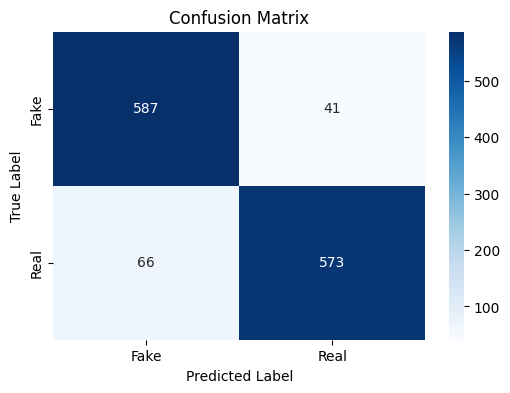

In [44]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()